In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy import signal
from matplotlib import axes
import scipy

data_url= r"C:\Users\ozturklab\Desktop\Chao_Liu_Nanowire\Parylene-C\laser_Open_parylene-C3-current_voltage.txt"
df = pd.read_csv(data_url, delimiter = "\t")
df_x = df['Voltage (mV)'].to_numpy()
df_y = df['Current (A)'].to_numpy()

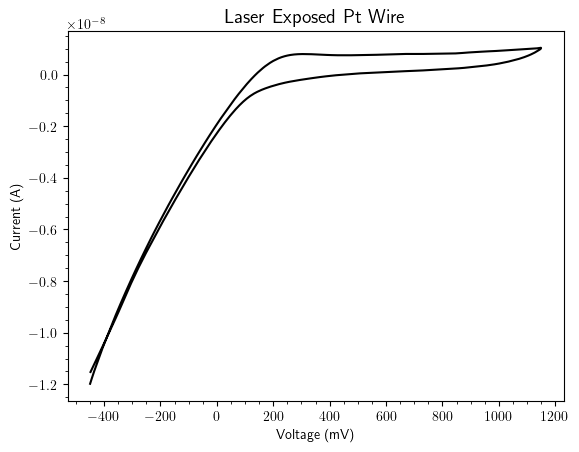

In [6]:
plt.rcParams['text.usetex'] = True

plt.plot (df_x[1920:5760], df_y[1920:5760], color= 'black')
plt.title('Laser Exposed Pt Wire',color='black', size='14')
plt.xlabel ('Voltage (mV)')
plt.ylabel ('Current (A)')
plt.minorticks_on()
plt.show ()

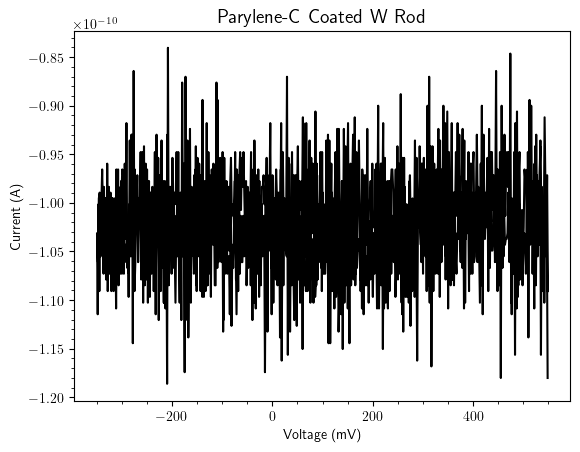

In [9]:
data_url= r"C:\Users\ozturklab\Desktop\Chao_Liu_Nanowire\Parylene-C\coated_W_rod_1mm1-current_voltage.txt"
df_c = pd.read_csv(data_url, delimiter = "\t")
df_c_x = df_c['Voltage (mV)'].to_numpy()
df_c_y = df_c['Current (A)'].to_numpy()

plt.rcParams['text.usetex'] = True

plt.plot (df_c_x, df_c_y, color= 'black')
plt.title('Parylene-C Coated W Rod',color='black', size='14')
plt.xlabel ('Voltage (mV)')
plt.ylabel ('Current (A)')
plt.minorticks_on()
plt.show ()

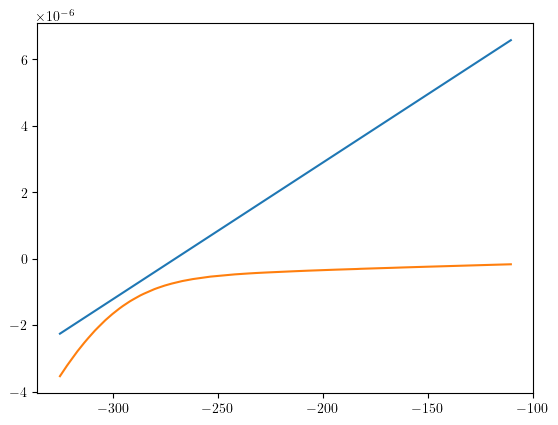

In [4]:
length_try =50
start_point = 550
df_fit  = df_y[start_point:start_point+length_try]
x_0_fit = df_x[start_point:start_point+length_try]

from scipy.optimize import curve_fit

def func (x,a,b):
    return a*x+b

popt, pcov= curve_fit(func, x_0_fit, df_fit)

numbers_try = 130
start_point = 395
x_0_fit = df_x[start_point:start_point+numbers_try]
plt.plot (x_0_fit, func(x_0_fit, *popt))
plt.plot (x_0_fit, df_y[start_point:start_point+numbers_try])
plt.show ()

In [5]:
from scipy.integrate import cumulative_trapezoid 
from scipy.integrate import simpson

y_itg = (func(x_0_fit, *popt)-df_y[start_point:start_point+numbers_try])

itg_0 = cumulative_trapezoid  (y_itg, dx=1/60)
itg_1 = simpson (y_itg, dx=1/60)

print (itg_0[128])
print (itg_1)

6.16194050666789e-06
6.1617279819749845e-06


In [6]:
freqs_0, psd_0 = signal.welch(df_0)
freqs_1, psd_1 = signal.welch(df_1)

'''
plt.figure(figsize=(5, 4))
plt.loglog(freqs_0, psd_0/psd_0[0])
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs_1, psd_1 = signal.welch(df_1)

plt.figure(figsize=(5, 4))
plt.loglog(freqs_1, psd_1/psd_1[0])
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
'''

PSD_filtered_0 = signal.savgol_filter(df_0, 211, 4)
PSD_filtered_1 = signal.savgol_filter(df_1, 211, 4)

v_point= ['-650','-200','200','600','1000']
plt.figure (figsize=(9,6),dpi=120)

plt.plot (PSD_filtered_0 , color='red', label='Forward Scan')
plt.plot (PSD_filtered_1 , color='black', label='Reverse Scan')
plt.legend(loc=5)
plt.xticks (x_point, v_point)
plt.title('Underpotential deposition Curve',color='black', size='16')
plt.xlabel ('Voltage (mV)')
plt.ylabel ('Current (A)')

plt.show ()


NameError: name 'df_0' is not defined

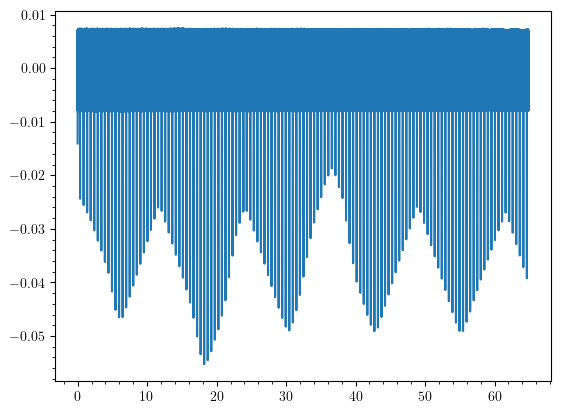

In [18]:
data_url= r"C:\Users\ozturklab\Desktop\Chao_Liu_Nanowire\Cell\dataclean-voltage_time.txt"
df_c = pd.read_csv(data_url, delimiter = "\t")
df_c_x = df_c['Time (s)'].to_numpy()
df_c_y = df_c['Voltage (V)'].to_numpy()

plt.rcParams['text.usetex'] = True
plt.plot (df_c_x, df_c_y)
plt.minorticks_on()
plt.show ()

c:\Users\ozturklab\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


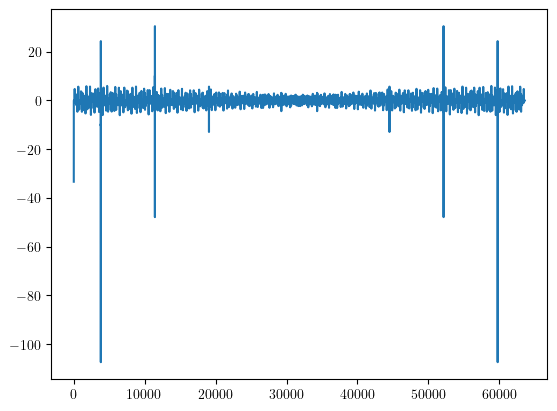

In [6]:
from scipy.fft import fft, fftfreq
import numpy as np
fourier = fft(df_c_y)

# Plot the result (the spectrum |Xk|)
plt.plot(fourier)
plt.show()

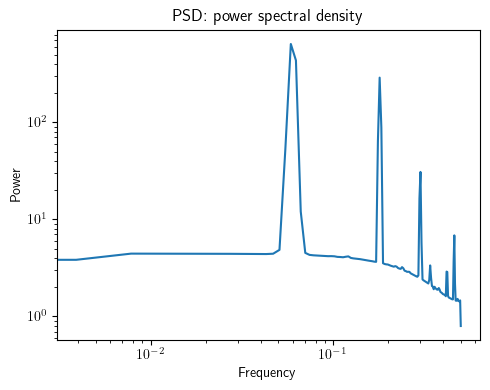

[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.3476

In [37]:
freqs_0, psd_0 = signal.welch(df_c_y)

plt.figure(figsize=(5, 4))
plt.loglog(freqs_0, psd_0/psd_0[0])
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
print (freqs_0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


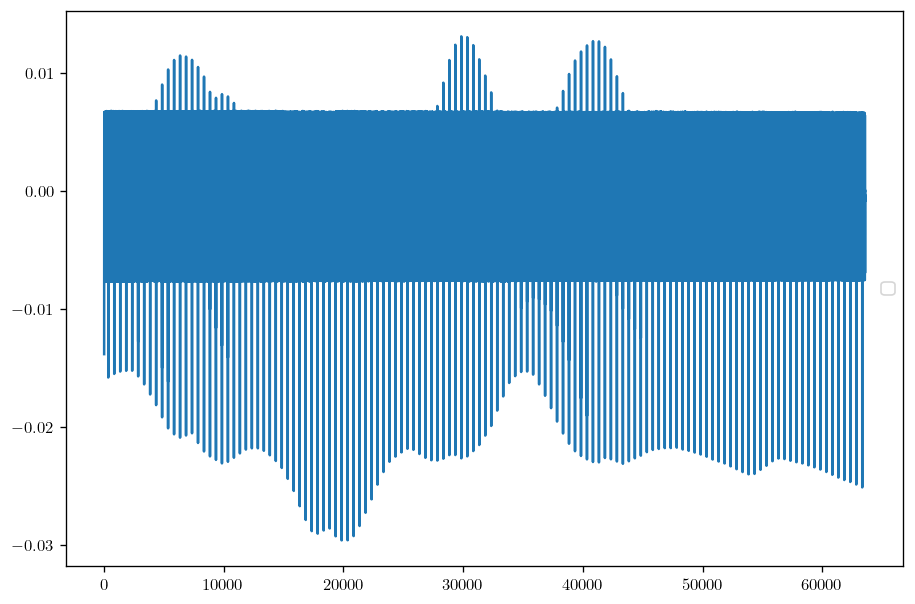

In [36]:
PSD_filtered_0 = signal.savgol_filter(df_c_y, 8, 4)
plt.figure (figsize=(9,6),dpi=120)
plt.plot (PSD_filtered_0)
plt.legend(loc=5)
plt.show ()